<a href="https://colab.research.google.com/github/turagsarkar/Using-deep-transfer-learning-approch-for-Image-Based-Plant-leaf-Disease-Detection-model/blob/main/Image_Based_Plant_leaf_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***`Using deep neural network  for Image-Based Plant leaf Disease Detection model based on computer vision`***

***Dataset collection from***
https://www.kaggle.com/datasets/rashikrahmanpritom/plant-disease-recognition-dataset/data


In [ ]:
#collcting data from google drive
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#libaray import
import keras
import numpy as np
import PIL
import PIL.Image
import pathlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Activation, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from keras.models import Sequential

In [ ]:
#Load data using a Keras utility
batch_size = 16
img_height = 256
img_width = 256

In [ ]:
data_dir='/content/drive/MyDrive/leaf/Train/Train'
data_dir_vs='/content/drive/MyDrive/leaf/Validation/Validation'
data_dir_ts='/content/drive/MyDrive/leaf/Test/Test'

In [ ]:
#Source: https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = ['Healthy', 'Powdery', 'Rust'],
    batch_size = batch_size,
    image_size = (img_height, img_width),
    shuffle = True,
    seed = 123,
    validation_split = 0,
    crop_to_aspect_ratio = True)

Found 1322 files belonging to 3 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Healthy', 'Powdery', 'Rust']


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_vs,
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = ['Healthy', 'Powdery', 'Rust'],
    batch_size = batch_size,
    image_size = (img_height, img_width),
    shuffle = True,
    seed = 123,
    validation_split = 0,
    crop_to_aspect_ratio = True)

Found 60 files belonging to 3 classes.


In [ ]:
test_set=tf.keras.utils.image_dataset_from_directory(
    data_dir_ts,
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = ['Healthy', 'Powdery', 'Rust'],
    batch_size = batch_size,
    image_size = (img_height, img_width),
    shuffle = True,
    seed = 123,
    validation_split = 0,
    crop_to_aspect_ratio = True)

Found 150 files belonging to 3 classes.


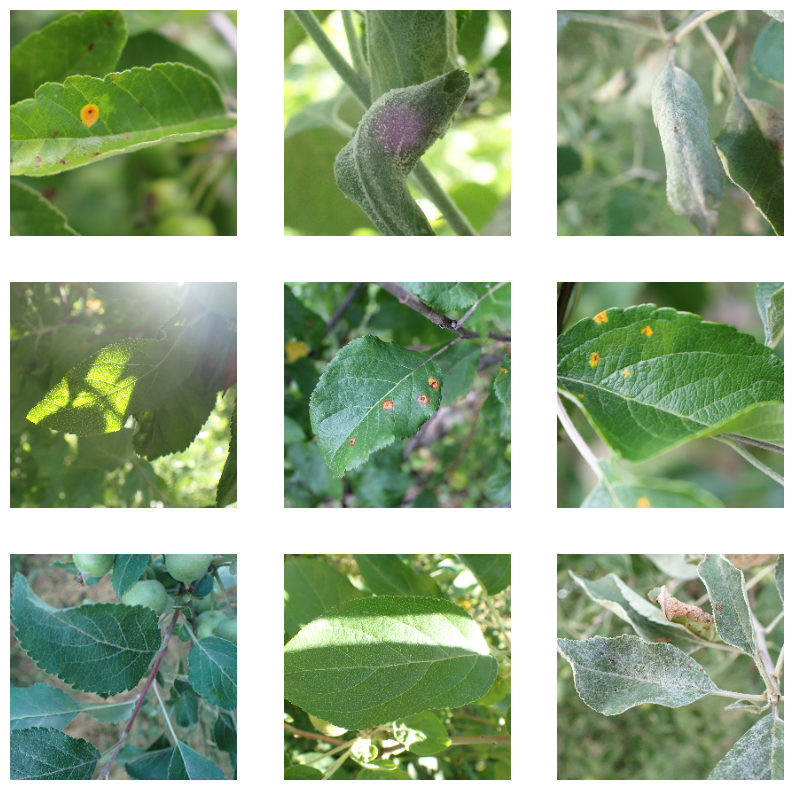

In [ ]:
#Data Exploration and Visualisation
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(16, 256, 256, 3)
(16, 3)


In [ ]:
#AUTOTUNE = tf.data.AUTOTUNE

#train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
#val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
print('\nTraining Dataset:', train_ds)
print('\nValidation Dataset:', val_ds)


Training Dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

Validation Dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>


In [ ]:
# Checking minimum and maximum pixel values in the train dataset
min_value = float('inf')
max_value = -float('inf')

for img, label in train_ds:
    batch_min = tf.reduce_min(img)
    batch_max = tf.reduce_max(img)

    min_value = min(min_value, batch_min.numpy())
    max_value = max(max_value, batch_max.numpy())

print('\nMinimum pixel value in the Validation dataset', min_value)
print('\nMaximum pixel value in the Validation dataset', max_value)


Minimum pixel value in the Validation dataset 0.0

Maximum pixel value in the Validation dataset 255.0


In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
#Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.02254902 1.0


In [ ]:
train_ds =train_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_set.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

In [ ]:
# Checking minimum and maximum pixel values in the Validation dataset
min_value = float('inf')
max_value = -float('inf')

for img, label in val_ds:
    batch_min = tf.reduce_min(img)
    batch_max = tf.reduce_max(img)

    min_value = min(min_value, batch_min.numpy())
    max_value = max(max_value, batch_max.numpy())

print('\nMinimum pixel value in the Validation dataset', min_value)
print('\nMaximum pixel value in the Validation dataset', max_value)


Minimum pixel value in the Validation dataset 0.0

Maximum pixel value in the Validation dataset 1.0


In [ ]:
# Checking minimum and maximum pixel values in the training dataset
min_value = float('inf')
max_value = -float('inf')

for img, label in train_ds:
    batch_min = tf.reduce_min(img)
    batch_max = tf.reduce_max(img)

    min_value = min(min_value, batch_min.numpy())
    max_value = max(max_value, batch_max.numpy())

print('\nMinimum pixel value in the Training dataset', min_value)
print('\nMaximum pixel value in the Training dataset', max_value)


Minimum pixel value in the Training dataset 0.0

Maximum pixel value in the Training dataset 1.0


In [ ]:
#data augmentation
augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomRotation(
        factor = (-.25, .3),
        fill_mode = 'reflect',
        interpolation = 'bilinear',
        seed = 123),


        tf.keras.layers.RandomBrightness(
        factor = (-.45, .45),
        value_range = (0.0, 1.0),
        seed = 123),

        tf.keras.layers.RandomContrast(
        factor = (.5),
        seed = 123)
    ]
)

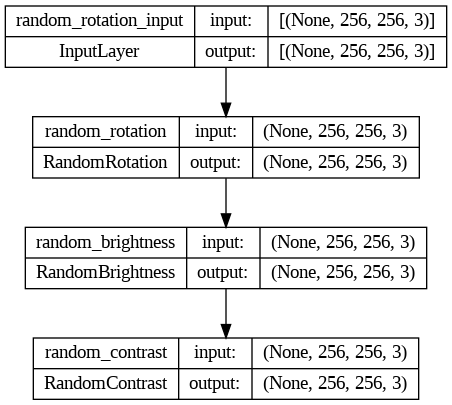

In [ ]:
augmentation.build((None, 256, 256, 3)) # Building model
# Plotting model
tf.keras.utils.plot_model(augmentation,
                          show_shapes = True,
                          show_layer_names = True,
                          expand_nested = True)

In [ ]:
#CNN base layer
model= Sequential()

model.add(augmentation)

#Feature Layers
model.add(Conv2D(32,                  # Kernels
                     (3,3),               # Size of kernels (3x3 matrix)
                     strides = 1,         # Step size for sliding the kernel across the input (1 pixel at a time).
                     padding = 'same',    # 'Same' ensures that the output feature map has the same dimensions as the input by padding zeros around the input.
                    input_shape = (256,256,3) # Input image shape
                    ))
model.add(Activation('relu'))# Activation function
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv2D(64, (5,5), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(Dropout(0.3))

model.add(Conv2D(256, (5,5), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(Dropout(0.3))

model.add(Conv2D(512, (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(Dropout(0.3))

    # Flattening tensors
model.add(Flatten())

    # Fully-Connected Layers
model.add(Dense(2048))
model.add(Activation('relu'))
model.add(Dropout(0.5))

    # Output Layer
model.add(Dense(3, activation = 'softmax')) # Classification layer

In [ ]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor = 'val_accuracy',
                              patience = 5, mode = 'max',
                              restore_best_weights = True)

checkpoint = ModelCheckpoint('model_new.h5',
                            monitor = 'val_accuracy',
                            save_best_only = True)

In [ ]:
try:
    history = model.fit(
        train_ds, epochs =50,
        validation_data = test_ds,
        callbacks = [early_stopping, checkpoint])
except Exception as e:
    print("An error occurred:", e)

Epoch 1/50
83/83 [==============================] - 75s 824ms/step - loss: 0.5044 - accuracy: 0.8676 - val_loss: 0.8707 - val_accuracy: 0.8600
Epoch 2/50
83/83 [==============================] - 76s 821ms/step - loss: 0.4605 - accuracy: 0.8744 - val_loss: 0.5812 - val_accuracy: 0.9267
Epoch 3/50
83/83 [==============================] - ETA: 0s - loss: 0.4025 - accuracy: 0.8926

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


83/83 [==============================] - 76s 835ms/step - loss: 0.4025 - accuracy: 0.8926 - val_loss: 0.7695 - val_accuracy: 0.9400
Epoch 4/50
83/83 [==============================] - 67s 744ms/step - loss: 0.3339 - accuracy: 0.9115 - val_loss: 0.7329 - val_accuracy: 0.9200
Epoch 5/50
83/83 [==============================] - 77s 846ms/step - loss: 0.4170 - accuracy: 0.9024 - val_loss: 0.8187 - val_accuracy: 0.9333
Epoch 6/50
83/83 [==============================] - 72s 784ms/step - loss: 0.3672 - accuracy: 0.9092 - val_loss: 0.6489 - val_accuracy: 0.9400
Epoch 7/50
83/83 [==============================] - 65s 732ms/step - loss: 0.4586 - accuracy: 0.9054 - val_loss: 0.9912 - val_accuracy: 0.9133
Epoch 8/50
83/83 [==============================] - 69s 756ms/step - loss: 0.3313 - accuracy: 0.9092 - val_loss: 0.5474 - val_accuracy: 0.9600
Epoch 9/50
83/83 [==============================] - 67s 742ms/step - loss: 0.2740 - accuracy: 0.9319 - val_loss: 0.7684 - val_accuracy: 0.9533
Epoch 10/5

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 activation (Activation)     (None, 256, 256, 32)      0         
                                                                 
 batch_normalization (Batch  (None, 256, 256, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 128, 128, 32)     

In [ ]:
import numpy as np
preds = model.predict(train_ds)
train_loss, train_acc = model.evaluate(train_ds) # Obtaining Loss and Accuracy on the train dataset

print('\ntraining Loss: ', train_loss)
print('\ntraining Accuracy: ', np.round(train_acc * 100), '%')

83/83 [==============================] - 59s 649ms/step - loss: 0.1545 - accuracy: 0.9697

training Loss:  0.15451012551784515

training Accuracy:  97.0 %


In [ ]:
import numpy as np
preds = model.predict(val_ds)
val_loss, val_acc = model.evaluate(val_ds)

print('\nValidation Loss: ', val_loss)
print('\nValidation Accuracy: ', np.round(val_acc * 100), '%')

4/4 [==============================] - 4s 29ms/step - loss: 0.3865 - accuracy: 0.9333

Validation Loss:  0.38653597235679626

Validation Accuracy:  93.0 %


In [ ]:
import numpy as np
preds = model.predict(test_ds)
train_loss, train_acc = model.evaluate(test_ds) # Obtaining Loss and Accuracy on the train dataset

print('\nTest Loss: ', train_loss)
print('\nTest Accuracy: ', np.round(train_acc * 100), '%')

10/10 [==============================] - 6s 51ms/step - loss: 0.5474 - accuracy: 0.9600

Test Loss:  0.547412633895874

Test Accuracy:  96.0 %


In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(16, 256, 256, 3)
(16, 3)


In [ ]:
predicted_batch = model.predict(image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
label_id = np.argmax(labels_batch, axis=-1)

1/1 [==============================] - 0s 25ms/step


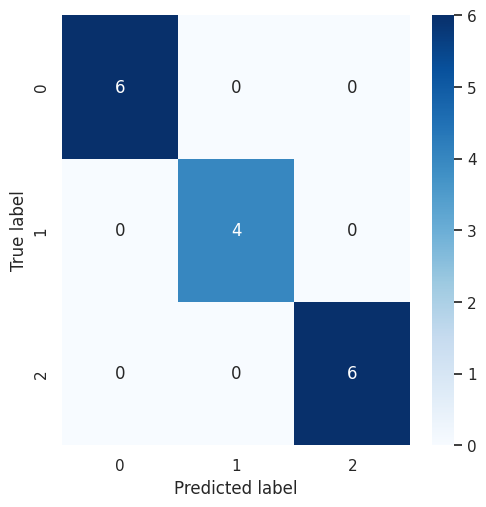

In [ ]:
#confusion matrix
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()

con_mat_df=tf.math.confusion_matrix(
    labels = label_id , predictions = predicted_id
)

figure = plt.figure(figsize=(5, 5))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(label_id, predicted_id, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         6

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



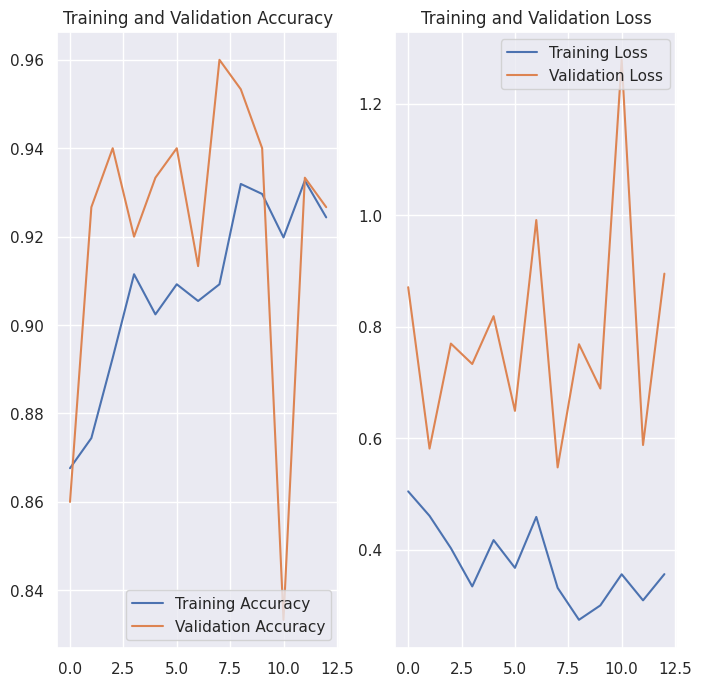

In [ ]:
epochs=13
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#import gardio
#image = gardio.inputs.Image(shape=(256,256))
#label = gardio.outputs.Label(num_top_classes=5)

#gardio.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

In [ ]:
def predict_image(img):
  img_4d=img.reshape(-1,256,256,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(3)}


# TRANSFER LEARNING METHOD FOR BETTER PERFORMANCE

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
for layer in inception.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(inception.output)
prediction = Dense(3, activation='softmax')(x)

# create a model object
conv_base = Model(inputs=inception.input, outputs=prediction)

In [ ]:
conv_base.summary()

In [ ]:
num_classes = 3

model_new = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])


In [ ]:
model_new.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
img_height,img_width=224,224
batch_size=32
train_dsnew = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:
val_dsnew = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


In [ ]:
history = model_new.fit(train_dsnew
                    ,epochs=10,
                    validation_data=val_dsnew)

In [ ]:
from keras.applications.vgg16 import VGG16
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(224,224,3)
)

In [ ]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

In [ ]:
conv_base.summary()

In [ ]:
from keras import Sequential
model_2 = Sequential()
model_2.add(augmentation)
model_2.add(conv_base)
model_2.add(Flatten())
model_2.add(Dense(256,activation='relu'))
model_2.add(Dense(1,activation='sigmoid'))

In [ ]:
model_2.compile(
    optimizer=keras.optimizers.RMSprop(lr=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
  )

In [ ]:
history = model_2.fit(train_ds,epochs=10,validation_data=val_ds)

In [ ]:
for image, _ in train_ds.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [ ]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SIZE = (256, 256)
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [ ]:
image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

In [ ]:
base_model.trainable = False

In [ ]:
# Let's take a look at the base model architecture
base_model.summary()

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

In [ ]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

In [ ]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [ ]:
inputs = tf.keras.Input(shape=(256, 256, 3))
x = augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
model.summary()

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0, name='accuracy')])

In [ ]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(val_ds)

In [ ]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

In [ ]:
history = model.fit(train_ds,
                    epochs=initial_epochs,
                    validation_data=val_ds)

In [ ]:
from keras.models import Sequential

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [ ]:
IMAGE_SIZE = [256, 256]

In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
for layer in inception.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(inception.output)

In [ ]:
folders=train_ds

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
model.summary()

In [ ]:
 model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)